# Functions

In [1]:
from tcc_markov_chain.base_simulation import Simulation
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from typing import List
from tcc_markov_chain.systems import HDPeriodic,DiskSystem
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# observables
from tcc_markov_chain.observables.hard_disk import particle_density, rdf

# Functions

In [3]:
class RDF():
    def __init__(
            self,
            box_size,
            n_bins=10,
        ):
        # self.system=system
        self.n_bins=n_bins
        self.bin_size = box_size / (2*n_bins)
        self.bins =np.zeros(n_bins+1)

    def eval(self, system:DiskSystem):
        distances = system.calculate_relative_positions()
        distances = np.linalg.norm(distances,axis=1)
        for d in distances:
            # print(d//self.bin_size, d, self.bin_size)
            if int(d//self.bin_size)==11:
                print(distances, system.positions)
            self.bins[int(d//self.bin_size)]+=2

        return True

In [4]:
class ProbabilityDensityPosition():
    def __init__(self, sim:Simulation,n_bins=10):
        self.box_size = sim.system.box_size
        self.n_bins=n_bins
        self.bin_size = sim.system.box_size / n_bins
        self.bins = np.zeros([n_bins,n_bins],dtype=float)
        self.steps = 0

    def evaluate(self,sys:DiskSystem):
        idx = (sys.positions[1] // self.bin_size).astype(int)
        self.bins[idx[0],idx[1]]+=1
        
        self.steps+=1
        return self.bins
    
    def normalize_results(self):
        return self.bins / self.steps

# Main

## Direct sampling - 2 particle problem

2025-07-16 22:00:29,695 - INFO - creting system with 2 particles of radii 0.65
2025-07-16 22:00:29,696 - INFO - density: 0.6636614480708438, box size 2
2025-07-16 22:00:29,697 - INFO - system created


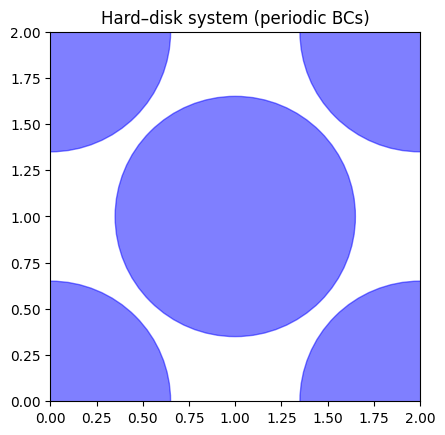

In [5]:
box_size=2
n_particles=2
particle_radius=0.65
n_steps=int(1e3)
positions = np.array([[0,0],[1.,1]],dtype=float)
sys = HDPeriodic(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles,positions=positions)
sys.plot_system()

In [ ]:
sim = PeriodicDirectSampling(deepcopy(sys))
sim_pd = ProbabilityDensityPosition(sim,n_bins=10)
sim_run = sim.run(sim_pd.evaluate,n_steps=n_steps/2)

for step in sim_run:
    continue

100%|██████████| 1000/1000 [00:03<00:00, 287.25it/s]


In [7]:
hist = sim_pd.normalize_results()
print(hist.mean())
print(hist.std())

0.01
0.003249615361854384


## Markov Chain/Direct sampling Probabilitie density

2025-07-16 22:04:40,539 - INFO - creting system with 4 particles of radii 1
2025-07-16 22:04:40,541 - INFO - density: 0.12566370614359174, box size 10
2025-07-16 22:04:40,543 - INFO - system created


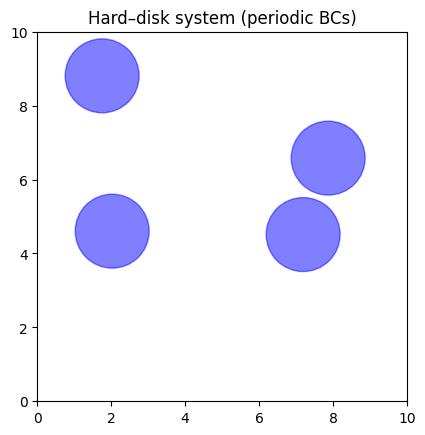

In [29]:
#Defining system
box_size=10
n_particles=4
particle_radius=1
sys = HDPeriodic(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles)
sys.plot_system()

In [ ]:
def run_simulation(sim,n_steps):
    evaluator = ProbabilityDensityPosition(sim,n_bins=10)
    sim_run = sim.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
    for step in sim_run:
        continue
    hist = evaluator.normalize_results()
    print(hist.mean())
    print(hist.std())
    


In [ ]:
#defining markov chain simualtion
n_steps=int(1e6)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius)
evaluator = ProbabilityDensityPosition(sim_mc,n_bins=10)
sim_mc_run = sim_mc.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
for step in sim_mc_run:
    continue
hist = evaluator.normalize_results()
print(hist.mean())
print(hist.std())

100%|██████████| 100000/100000 [00:01<00:00, 64442.36it/s]

0.009999999999999998
0.001489658350092396


In [ ]:
# Defining direct sampling simulations
n_steps=int(1e6)
sim_ds = PeriodicDirectSampling(sys=deepcopy(sys))
evaluator = ProbabilityDensityPosition(sim_dc,n_bins=10)
sim_mc_run = sim_mc.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
for step in sim_mc_run:
    continue
hist = evaluator.normalize_results()
print(hist.mean())
print(hist.std())

### Phase transition

In [12]:
box_size = 10
particle_radius=0.6
n_particles=20
n_steps = int(1e5)
n_bins=int(50)

sys = HardDiskSystem(box_size=box_size, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)

bin_size = sim_mc.sys.box_size / (2*n_bins)
bins = np.linspace(0, sim.sys.box_size/2, n_bins + 1)
for step in sim_mc.run(eval_fn=lambda x: rdf(x,n_bins=n_bins),n_steps=n_steps):
    bins+=step

#ploting
density = n_particles / (box_size ** 2)
bins_centers = (np.linspace(0, sim.sys.box_size/2, n_bins + 1) * bin_size) + (bin_size / 2)
bins_normalization = (2 * np.pi * bins_centers * bin_size * density * n_particles * n_steps)
bins /= bins_normalization
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(bins_centers, bins, linestyle='-')

NameError: name 'HardDiskSystem' is not defined